In [17]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as ani

In [18]:
#TLoad the csv and select relevant data for plotting
df = pd.read_csv('fscv_traces.csv')
df.head()
df_plot = df[['coc_0.3','coc_1','coc_3','coc_10','coc_30']][:200]
df_plot.head()

,coc_0.3,coc_1,coc_3,coc_10,coc_30
0,0.05,0.02,0.04,0.10,0.08
1,-0.05,-0.02,0.01,0.06,0.11
2,0.01,0.00,0.08,0.01,0.01
3,-0.05,0.08,0.03,0.03,0.14
4,0.00,0.06,0.01,0.01,0.03


In [19]:
#set up writer for outputting animation as a video file
W = ani.writers['ffmpeg']
writer=W(fps=40)
dpi=600

<IPython.core.display.Javascript object>


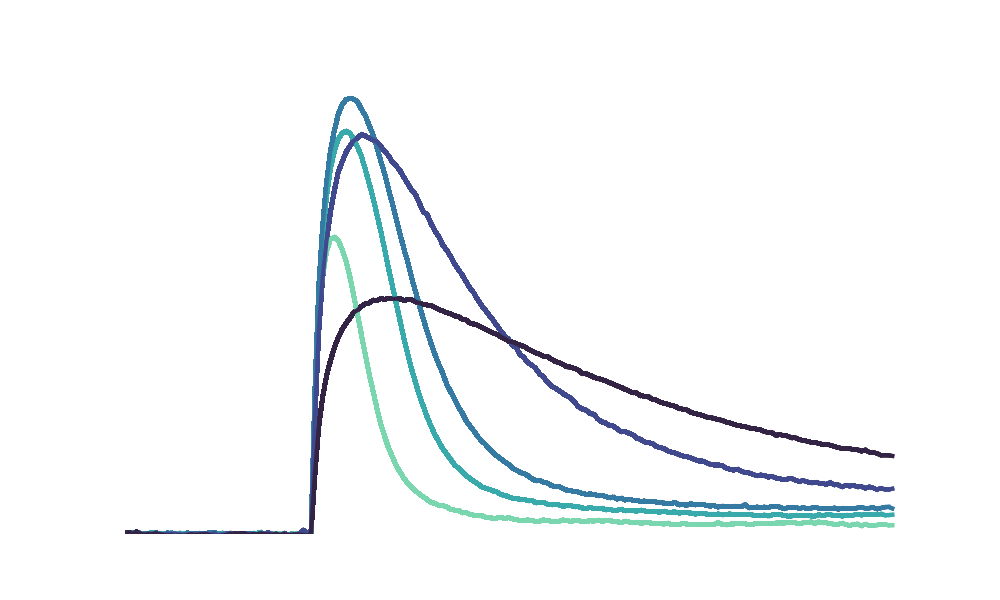

(0.0, 30.0)

In [20]:
#create empty plot
fig = plt.figure(figsize=(10,6))
plt.xlim(0,200)
plt.ylim(0,30)

In [21]:
#define function for use with FuncAnimation. 
def animate(i):
    data=df_plot[:i]
    color = sns.color_palette('mako_r',5)
    sns.despine(left=True, bottom=True)
    p = sns.lineplot(data=data, dashes=False, palette=color, legend=False, linewidth=3)
    p.set(xticklabels=[], yticklabels=[])
    p.tick_params(bottom=False, left=False)

#create animator with fig and animate as inputs, interval is number of milliseconds between frames    
animator = ani.FuncAnimation(fig, animate, frames=len(plotting), repeat=False, interval=1)

In [22]:
#Save animated plot as .mp4 file using writer defined above
animator.save('fscv_traces.mp4', writer=writer, dpi=dpi)